In [2]:
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import seaborn as sns
import missingno as msno
from missingpy import MissForest
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


sns.set(rc={'figure.figsize':(10, 8)})

In [3]:
df = pd.read_csv('train_music.csv', sep =',')
df

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,48104912810,0,7,1514,3,1.0,0,0.496508,0,299.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,13762.315646,1292.468784,NaN
1,4851497268,0,4,896,28,1.0,0,0.881540,0,189.0,...,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000053,NaN
2,4877823097,0,7,592,3,2.0,0,0.811192,0,347.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.000977,NaN
3,4830183791,0,7,1756,3,2.0,0,0.928449,1,343.0,...,66.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.006680,NaN
4,48103940036,0,4,1057,28,1.0,0,0.578654,0,355.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.002487,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4819141039,0,7,812,3,2.0,0,0.963514,0,357.0,...,65.0,0.0,0.0,0.0,0.0,NaN,NaN,815.758405,54.737625,NaN
69996,4888452526,0,7,1057,3,1.0,1,0.777850,0,364.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
69997,4812460312,0,7,745,3,2.0,0,0.980984,0,363.0,...,54.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
69998,4890036665,0,7,56,3,1.0,0,0.770969,0,341.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1832.938670,72.373650,NaN


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 461 entries, id to service_9_flag_m3
dtypes: float64(452), int64(9)
memory usage: 246.2 MB


In [9]:
df = df.sample(n = 20000, random_state=42)
df

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
46730,48101197942,0,7,592,3,2.0,0,0.632435,0,108.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,716.420311,NaN,NaN
48393,48104251257,0,7,1057,3,2.0,0,0.540345,0,330.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,80.144736,14.630618,NaN
41416,4811813104,0,7,1057,3,2.0,0,0.951582,0,344.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.018959,0.000977,57.100249,NaN
34506,48101053138,0,7,745,3,2.0,0,0.659047,0,361.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
43725,4830019330,0,7,1057,3,2.0,0,0.926471,0,199.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1989.913944,29.685412,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63473,4894477348,1,7,1057,3,2.0,0,0.707827,0,221.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
66494,4875984633,0,7,592,3,2.0,0,0.824135,0,355.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,5979.779220,265.482364,NaN
56986,4811247711,0,7,728,3,1.0,0,0.924764,0,208.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
43542,4896164388,0,7,1057,3,2.0,0,0.716732,0,324.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,28.008975,10.813313,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 46730 to 59369
Columns: 461 entries, id to service_9_flag_m3
dtypes: float64(452), int64(9)
memory usage: 70.5 MB


In [11]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,20000.0,1.306414e+10,1.719221e+10,4.825674e+08,4.832647e+09,4.872661e+09,4.897139e+09,4.810855e+10
target,20000.0,7.480000e-02,2.630749e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
device_type,20000.0,6.529000e+00,1.201970e+00,1.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00
manufacturer_category,20000.0,8.895698e+02,4.940030e+02,1.000000e+00,5.920000e+02,8.960000e+02,1.057000e+03,1.836000e+03
os_category,20000.0,7.733400e+00,9.564214e+00,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.800000e+01
...,...,...,...,...,...,...,...,...
income_brnd_cont_m3,2654.0,1.789848e+01,7.412896e+01,7.843000e-01,2.745100e+00,8.329400e+00,1.950978e+01,3.001067e+03
data_type_1_m3,2359.0,2.319182e+03,5.695641e+03,1.325607e-04,5.390087e+01,4.940910e+02,2.052402e+03,7.218172e+04
data_type_2_m3,12782.0,2.796011e+03,6.620885e+03,4.959106e-05,1.303041e+02,6.685948e+02,2.463017e+03,2.751830e+05
data_type_3_m3,14299.0,3.689081e+02,1.061644e+03,3.051758e-05,4.845811e+00,5.673287e+01,3.009783e+02,3.355381e+04


In [12]:
s = df.isna().sum()
nan = pd.DataFrame(data = s[s != 0].sort_values(ascending=False), columns=['Total NaN count'])
nan['Percent'] = df.isna().mean() * 100.0

nan.T

,count_url_category_13,count_url_category_15,count_app_3,vol_app_3,count_url_category_12,count_app_11,vol_app_11,count_url_category_1,count_gift_type_4,rr_gift_type_4,...,act_days_count_m2,paym_el_count_m2,paym_el_sum_m2,short_in_calls_part_m2,short_out_calls_part_m2,paym_el_count_m1,sms_onnet_out_pack_count_m2,sms_onnet_out_pack_count_m1,service_5_count_m2,abon_part_m2
Total NaN count,19853.000,19760.0,19719.000,19719.000,19644.00,19546.00,19546.00,19450.00,19425.000,19425.000,...,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000
Percent,99.265,98.8,98.595,98.595,98.22,97.73,97.73,97.25,97.125,97.125,...,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015


Ситуация с null ужасна, перед тем как делать окончательные выводы, посмотрим что у нас с балансом.

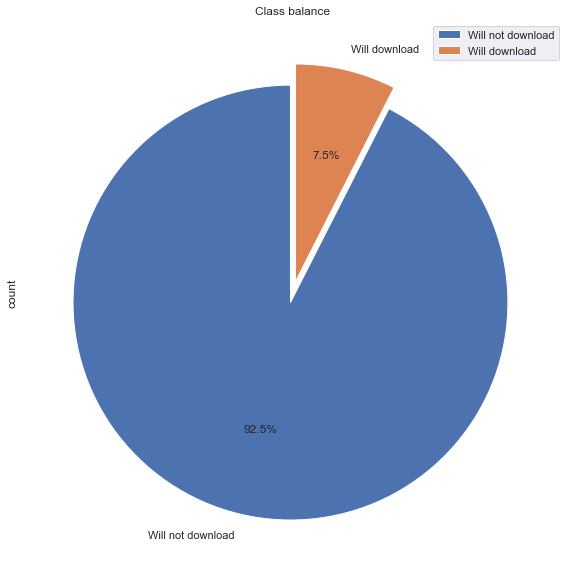

In [13]:
figure, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Class balance")

pd.DataFrame(
    {'count': [df['target'].isin([0]).sum(),
               df['target'].isin([1]).sum()]},
    index=['Will not download','Will download']
).plot.pie(subplots=True, figsize=(8, 8), autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.05, 0.05), ax=ax)

plt.show()

На первый взгляд всё плохо. Огромное количество пропущенных данных и плохой баланс.
Очевидно, что семантику данных восстановить не получится, поскольку это данные пользователей и они как-то обработаны.
Прийдется работать с тем, что есть.

Итого:

    1) Слишком много NaN.
    РЕШЕНИЕ: Заполним пропущенные значения с самым выгодным условими для каждого признака.

    2) Слишком большое количество признаков, что не используется.
    РЕШЕНИЕ: Прийдется уменьшить количество признаков и выделить только самые нужные. Воспользуемся методом для нахождения тех признаков, что влияют на результат и уже будем проводить анализ и работать с этими признаками. (Feature Selection)

    3) Imbalance class.
    РЕШЕНИЕ: Воспользеумся методом Undersampling для уравнения классов. В качестве метрики будем использовать ROC-AUC.

Для анализа пропущенных значений я попробую использовать - missingo.
Он позволяет наглядно построить графики пропущенных значений.

Для заполнения пропусков значений воспользеумся - missingpy
Он позволяет заполнить NaN найлучшим способом для каждого признака

(TODO: ПОПРОБОВАТЬ сделать анализ null через missingo)

In [30]:
# НЕ ЗАПУСКАЕМ ЭТО
# imputer = MissForest(random_state=42, n_estimators = 35,  oob_score = True, n_jobs= -1)
# df_KNNImputer = imputer.fit_transform(df)

Iteration: 0
Iteration: 1
Iteration: 2


Сохраняем изменения в таблицу и сохраняем саму таблицу, чтобы, в случае перезагрузки JupyterNotebook не пришлось использовать этот метод еще раз

In [45]:
# НЕ ЗАПУСКАЕМ ЭТО
# df_ForestImputer = df_KNNImputer
# df_ForestImputer = pd.DataFrame(df_ForestImputer, columns = df.columns)
# df_ForestImputer.to_csv('Train_music_ForestImputer.csv', index=False)

In [46]:
df_ForestImputer = pd.read_csv('Train_music_ForestImputer.csv')
df_ForestImputer

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,4.810120e+10,0.0,7.0,592.0,3.0,2.0,0.0,0.632435,0.0,108.0,...,0.0,0.0,0.0,0.0,0.0,19.971334,127.895751,716.420311,114.566613,1.0
1,4.810425e+10,0.0,7.0,1057.0,3.0,2.0,0.0,0.540345,0.0,330.0,...,0.0,0.0,0.0,0.0,0.0,10.894140,234.292876,80.144736,14.630618,1.0
2,4.811813e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.951582,0.0,344.0,...,0.0,0.0,0.0,0.0,0.0,9.894929,0.018959,0.000977,57.100249,1.0
3,4.810105e+10,0.0,7.0,745.0,3.0,2.0,0.0,0.659047,0.0,361.0,...,0.0,0.0,0.0,0.0,0.0,8.183337,189.579215,118.776836,53.537855,1.0
4,4.830019e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.926471,0.0,199.0,...,0.0,0.0,0.0,0.0,0.0,2.217369,534.214973,1989.913944,29.685412,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.894477e+09,1.0,7.0,1057.0,3.0,2.0,0.0,0.707827,0.0,221.0,...,0.0,0.0,0.0,0.0,0.0,11.649066,522.172754,2286.497442,452.738112,1.0
19996,4.875985e+09,0.0,7.0,592.0,3.0,2.0,0.0,0.824135,0.0,355.0,...,0.0,0.0,0.0,0.0,0.0,2.159549,857.216847,5979.779220,265.482364,1.0
19997,4.811248e+09,0.0,7.0,728.0,3.0,1.0,0.0,0.924764,0.0,208.0,...,0.0,0.0,0.0,0.0,0.0,10.999666,196.408633,40.263622,0.071870,1.0
19998,4.896164e+09,0.0,7.0,1057.0,3.0,2.0,0.0,0.716732,0.0,324.0,...,0.0,0.0,0.0,0.0,0.0,14.756591,274.917012,28.008975,10.813313,1.0


(TODO: СДЕЛАТЬ KNNImputer и сравнить)

In [54]:
X = df_ForestImputer.drop(['target'], axis=1)
y = df_ForestImputer.target

In [55]:
X.drop(['id'], axis=1, inplace=True)
X

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3
0,7.0,592.0,3.0,2.0,0.0,0.632435,0.0,108.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,19.971334,127.895751,716.420311,114.566613,1.0
1,7.0,1057.0,3.0,2.0,0.0,0.540345,0.0,330.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.894140,234.292876,80.144736,14.630618,1.0
2,7.0,1057.0,3.0,2.0,0.0,0.951582,0.0,344.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.894929,0.018959,0.000977,57.100249,1.0
3,7.0,745.0,3.0,2.0,0.0,0.659047,0.0,361.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.183337,189.579215,118.776836,53.537855,1.0
4,7.0,1057.0,3.0,2.0,0.0,0.926471,0.0,199.0,1.0,25.0,...,0.0,0.0,0.0,0.0,0.0,2.217369,534.214973,1989.913944,29.685412,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7.0,1057.0,3.0,2.0,0.0,0.707827,0.0,221.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.649066,522.172754,2286.497442,452.738112,1.0
19996,7.0,592.0,3.0,2.0,0.0,0.824135,0.0,355.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.159549,857.216847,5979.779220,265.482364,1.0
19997,7.0,728.0,3.0,1.0,0.0,0.924764,0.0,208.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.999666,196.408633,40.263622,0.071870,1.0
19998,7.0,1057.0,3.0,2.0,0.0,0.716732,0.0,324.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.756591,274.917012,28.008975,10.813313,1.0


In [73]:
selector_50 = SelectKBest(f_classif, k=50)
selector_100 = SelectKBest(f_classif, k=100)
selector_50.fit(X, y)
selector_100.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols_50 = selector_50.get_support(indices=True)
cols_100 = selector_100.get_support(indices=True)
df_new_50 = X.iloc[:,cols_50]
df_new_100 = X.iloc[:,cols_100]

In [74]:
df_new_50['target'] = y
df_new_50

,os_category,lt,is_obl_center,count_sms_source_5,vol_app_5,rr_act_type_3,rr_act_type_8,rr_gift_type_3,count_act_type_1,count_act_type_3,...,paym_count_m3,voice_onnet_out_day_work_dur_m3,voice_onnet_in_day_work_dur_m3,voice_omo_out_night_rest_count_m3,sms_in_count_m3,content_count_m3,service_7_flag_m3,data_type_1_m3,data_type_2_m3,target
0,3.0,0.632435,0.0,1.0,3.710730e+05,0.0,0.000000,0.0,1.000000,1.000000,...,0.0,13860.0,10498.0,0.0,15.0,14.0,0.0,127.895751,716.420311,0.0
1,3.0,0.540345,1.0,0.0,4.475127e+08,0.0,0.500000,0.0,4.000000,1.028571,...,1.0,360.0,2860.0,0.0,0.0,28.0,0.0,234.292876,80.144736,0.0
2,3.0,0.951582,0.0,3.0,2.293159e+06,2.0,1.833333,2.0,5.000000,4.000000,...,0.0,2700.0,1092.0,0.0,3.0,52.0,0.0,0.018959,0.000977,0.0
3,3.0,0.659047,0.0,0.0,8.941500e+04,0.0,0.000000,0.0,1.000000,1.000000,...,0.0,3420.0,1714.0,0.0,6.0,5.0,0.0,189.579215,118.776836,0.0
4,3.0,0.926471,0.0,1.0,2.869470e+05,0.0,0.000000,0.0,6.000000,1.000000,...,0.0,16380.0,15146.0,0.0,18.0,34.0,0.0,534.214973,1989.913944,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.0,0.707827,0.0,0.0,8.465320e+05,0.0,0.000000,0.0,5.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,522.172754,2286.497442,1.0
19996,3.0,0.824135,1.0,2.0,2.059290e+08,0.0,0.000000,0.0,1.000000,1.057143,...,1.0,25200.0,23608.0,0.0,61.0,50.0,0.0,857.216847,5979.779220,0.0
19997,3.0,0.924764,1.0,0.0,1.526081e+08,0.0,0.000000,0.0,7.000000,2.000000,...,0.0,0.0,720.0,0.0,0.0,37.0,0.0,196.408633,40.263622,0.0
19998,3.0,0.716732,0.0,1.0,6.835147e+06,0.0,0.000000,0.0,1.057143,1.000000,...,1.0,41220.0,12369.0,2.0,103.0,34.0,0.0,274.917012,28.008975,0.0


In [75]:
df_new_100['target'] = y
df_new_100

,os_category,tp_flag,lt,service_3_flag,is_obl_center,count_sms_source_3,count_sms_source_5,count_sms_source_15,vol_app_5,vol_app_15,...,voice_omo_in_night_rest_count_m3,voice_out_uniq_count_m3,voice_in_uniq_count_m3,sms_in_count_m3,content_count_m3,service_7_flag_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,target
0,3.0,0.0,0.632435,0.0,0.0,0.0,1.0,0.0,3.710730e+05,5.084951e+06,...,0.0,74.0,79.0,15.0,14.0,0.0,127.895751,716.420311,114.566613,0.0
1,3.0,0.0,0.540345,0.0,1.0,0.0,0.0,2.0,4.475127e+08,2.260125e+07,...,0.0,3.0,6.0,0.0,28.0,0.0,234.292876,80.144736,14.630618,0.0
2,3.0,0.0,0.951582,0.0,0.0,0.0,3.0,0.0,2.293159e+06,2.661741e+07,...,0.0,24.0,14.0,3.0,52.0,0.0,0.018959,0.000977,57.100249,0.0
3,3.0,0.0,0.659047,0.0,0.0,0.0,0.0,0.0,8.941500e+04,1.457740e+07,...,0.0,9.0,5.0,6.0,5.0,0.0,189.579215,118.776836,53.537855,0.0
4,3.0,0.0,0.926471,0.0,0.0,0.0,1.0,0.0,2.869470e+05,1.415375e+06,...,0.0,64.0,70.0,18.0,34.0,0.0,534.214973,1989.913944,29.685412,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3.0,0.0,0.707827,0.0,0.0,0.0,0.0,0.0,8.465320e+05,5.656057e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,522.172754,2286.497442,452.738112,1.0
19996,3.0,0.0,0.824135,0.0,1.0,0.0,2.0,0.0,2.059290e+08,3.734388e+07,...,2.0,149.0,166.0,61.0,50.0,0.0,857.216847,5979.779220,265.482364,0.0
19997,3.0,0.0,0.924764,0.0,1.0,0.0,0.0,0.0,1.526081e+08,4.855550e+07,...,0.0,0.0,3.0,0.0,37.0,0.0,196.408633,40.263622,0.071870,0.0
19998,3.0,0.0,0.716732,0.0,0.0,0.0,1.0,0.0,6.835147e+06,2.161795e+08,...,4.0,145.0,145.0,103.0,34.0,0.0,274.917012,28.008975,10.813313,0.0
